## **Simulate Helmholtz coils with Square shape in a single Axis**

Change root directory

In [26]:
import os
os.chdir('/home/iaapp/brayan/helmholtzSim')
print(os.getcwd())

/home/iaapp/brayan/helmholtzSim


Import Libraries

In [27]:
import time
import numpy as np
import pandas as pd
from src import helmCoils_simulator as test_3
from src import plotMagneticField as hplot

Simulation Settings

In [30]:
# Initialize coil parameters
X_coil = test_3.CoilParameters(1.05, 0.59, 30)

# Current coil simulation
I = 1
# Rotation matriz
Ax = np.eye(3) ## eye rotation matrix

# Simulation settings
parallel_coils = 2
batch_Size = 120
grid_length_size = 0.01 #Space among evaluation points
num_seg = 100           #Numer of segments 

Set the spires Geometry

In [31]:
##Spawn spires
spire1_x_s, spire2_x_s = test_3.square_spires(Ax, X_coil.h, X_coil.a, num_seg)

f0 = None
f0 = hplot.plot_spires(f0, spire1_x_s, spire2_x_s, color='black', row=None, col=None)

# Plot the square spires
f0.show()

Set Simulation Grid

In [32]:
# Generar grid
X, Y, Z = test_3.generate_range(X_coil.a*7/8, grid_length_size)

hplot.plot_grid(X, Y, Z, f0)

## Run Simulations

In [33]:
#Run simulations
start_time = time.time() #Count start time
x_coil_results_s = test_3.coil_simulation_1d_sequential(X, Y, Z, X_coil, I, spire1_x_s, spire2_x_s, parallel_coils, batch_Size)
end_time = time.time()   #Mark ending time

# Calcular la norma del campo magnético B = sqrt(Bx^2 + By^2 + Bz^2)
x_coil_results_s["B_norm"] = np.sqrt(x_coil_results_s["Bx"]**2 + x_coil_results_s["By"]**2 + x_coil_results_s["Bz"]**2)

#Calculate and show the simulation time
execution_time = end_time - start_time
print(f'Simulation finished in {execution_time/60} minutes...')

# Save results in a CSV file
output_file = 'data/x_coil_results_square.csv'
x_coil_results_s.to_csv(output_file, index=False)

Simulation Progress: 100%|██████████| 313041/313041 [44:32<00:00, 117.15it/s] 


Simulation finished in 44.539014383157095 minutes...


## Plot the obtained results

In [36]:
# Read data from previous simulations
x_coil_results_s = pd.read_csv('data/x_coil_results_square.csv')

reference_value:  4.5662256914607546e-05


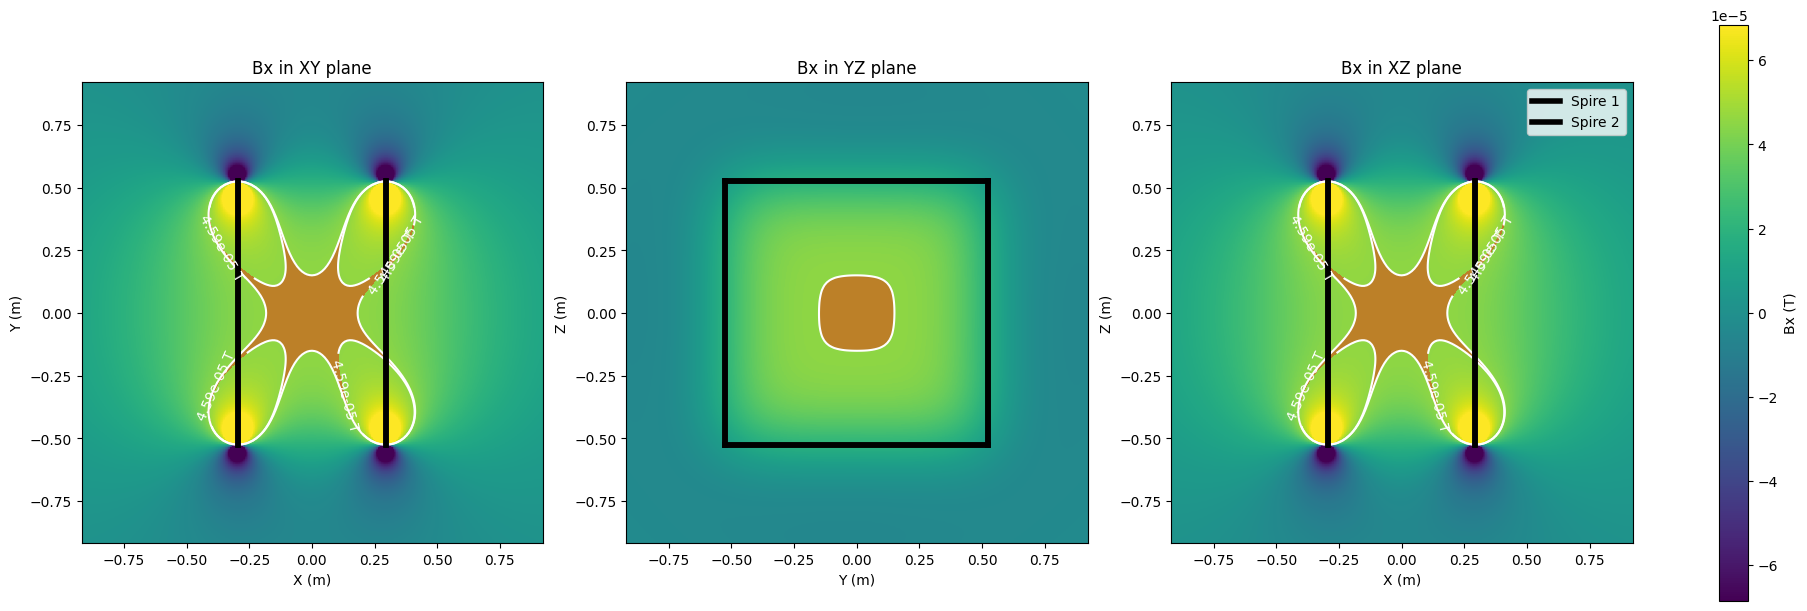

In [37]:
# Print the Bx component
hplot.plot_2d_magnetic_field(x_coil_results_s, spire1_x_s, spire2_x_s, index='Bx', use_fixed_zaxis=True)

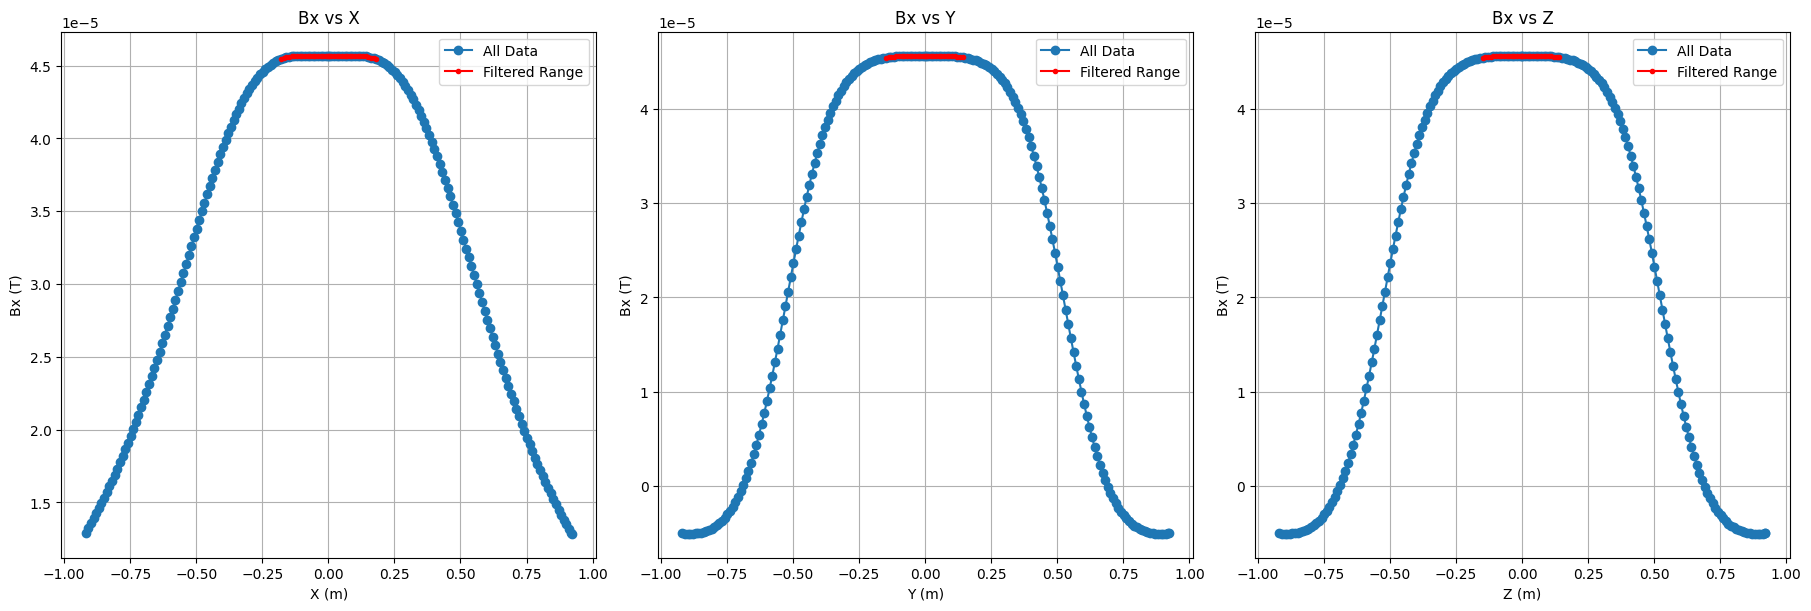

In [38]:
hplot.plot_mainAxis_field(x_coil_results_s, index='Bx')

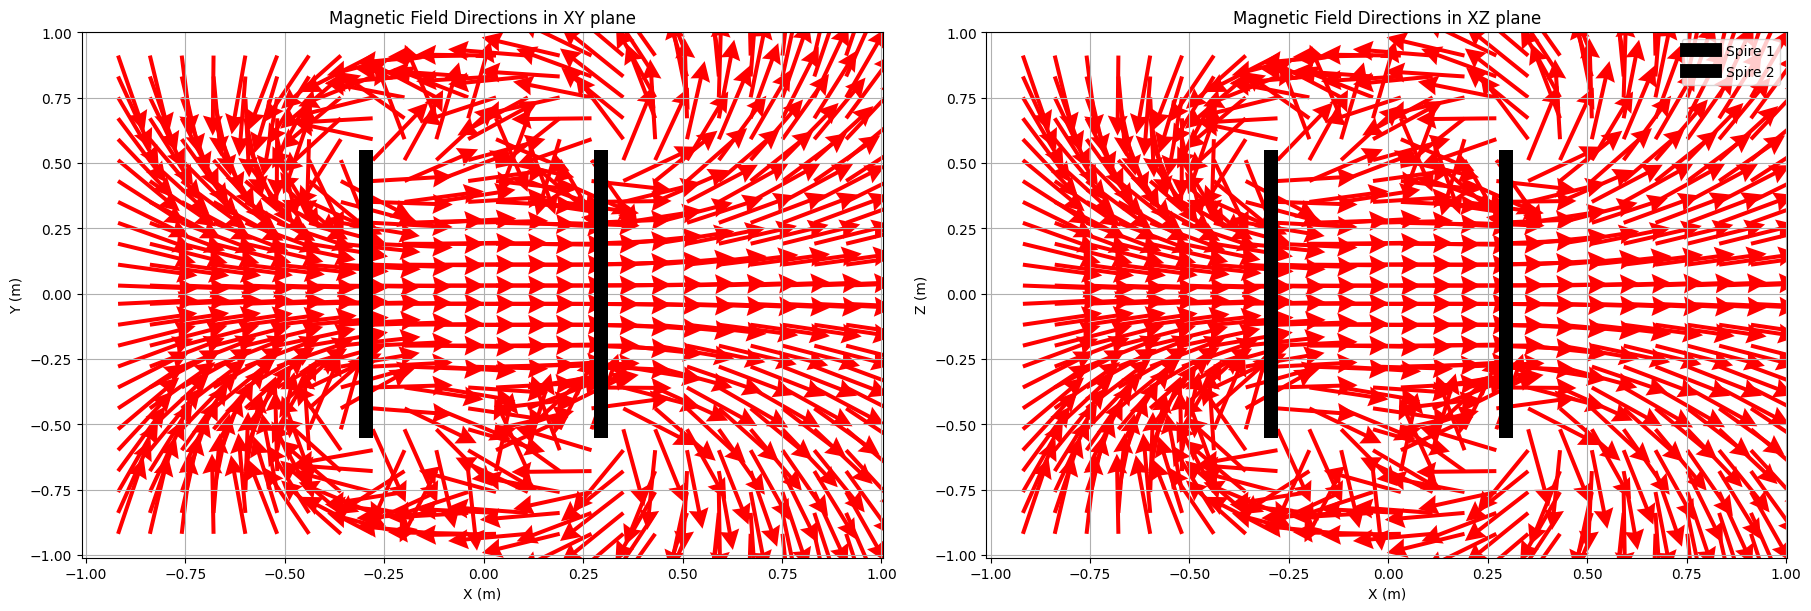

In [39]:
hplot.plot_magnetic_field_directions(x_coil_results_s, spire1_x_s, spire2_x_s)